<a href="https://colab.research.google.com/github/jessewilliamfreeman/cs480student/blob/main/05/Jesse_Freeman_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

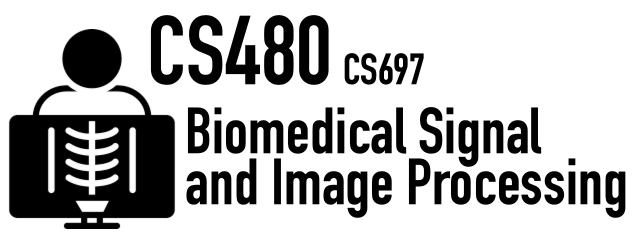
#Assignment 5

In [50]:
# In this assignment, we will visualize and explore a CT scan!

In [51]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [52]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [53]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [54]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [55]:
# 220 slices based on the number of images in the zip

In [56]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [57]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

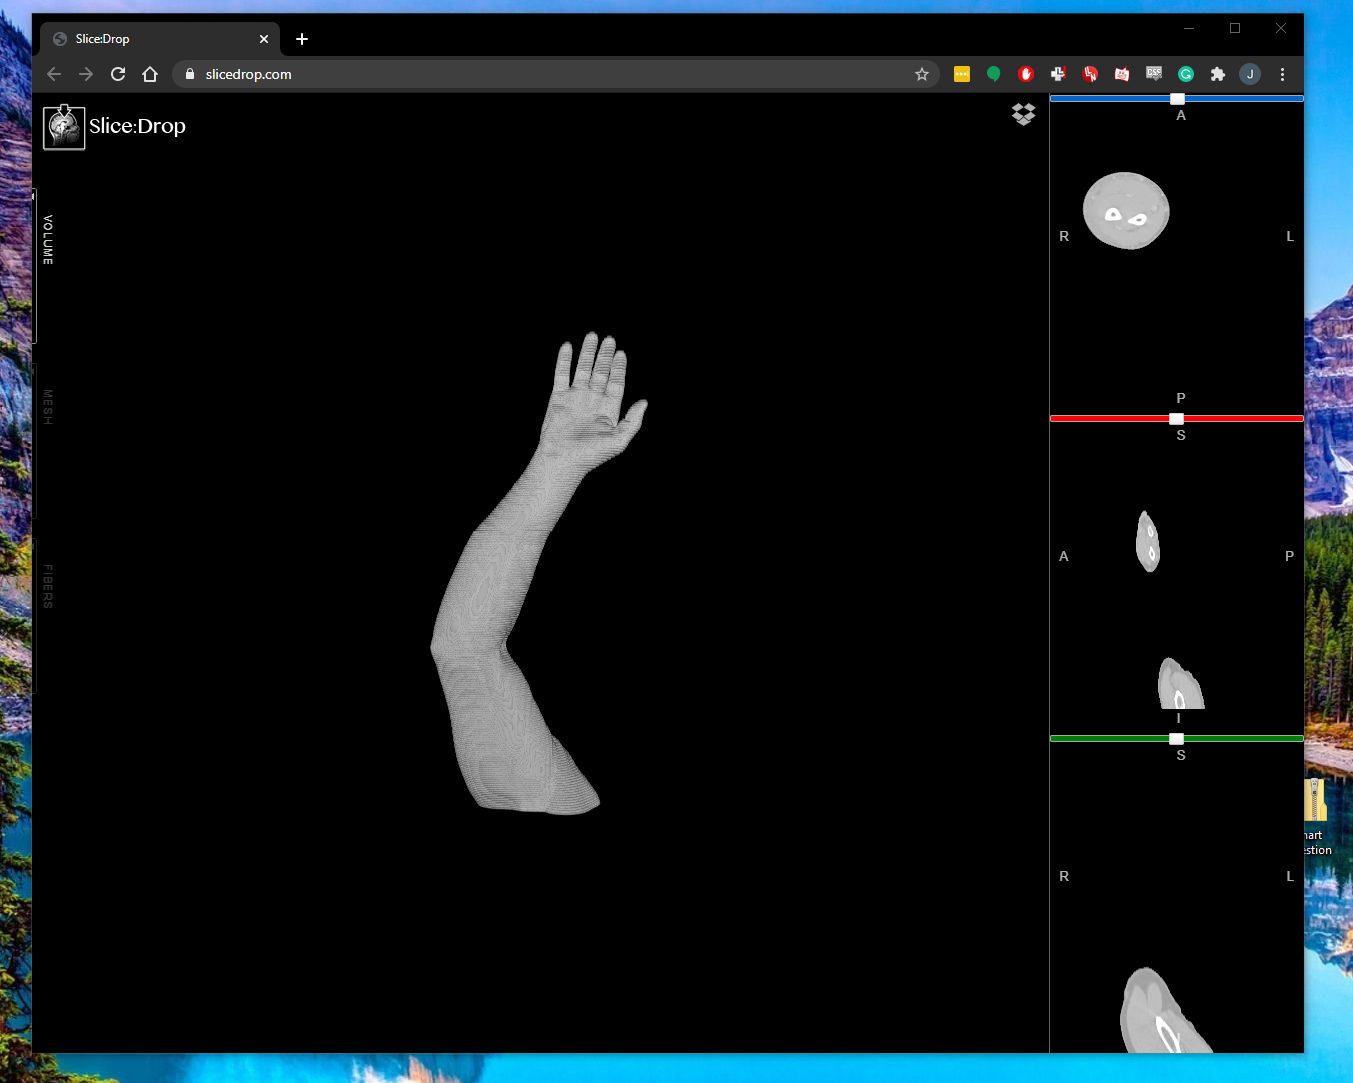

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [58]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [59]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [60]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [61]:
from pydicom import dcmread
import os

In [62]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

files = os.listdir('ct')
files.sort()
arm_full = np.zeros((454,512,220))
for num, arm_slice_file in enumerate(files):
  arm_slice = dcmread('ct/' + arm_slice_file).pixel_array
  arm_full[:,:,num] = arm_slice

In [63]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

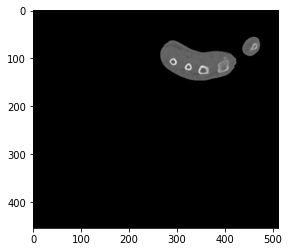

In [64]:
# TODO: YOUR CODE FOR AXIAL
imshow(arm_full[:,:,40], cmap='gray')

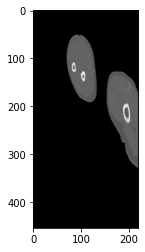

In [65]:
# TODO: YOUR CODE FOR SAGITTAL
imshow(arm_full[:,200,:], cmap='gray')

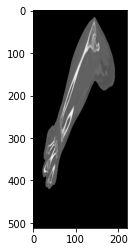

In [66]:
# TODO: YOUR CODE FOR CORONAL
imshow(arm_full[120,:,:], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [67]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [68]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [69]:
# TODO: YOUR CODE
dcmread('/content/ct/IM-0001-0100.dcm').__dict__.keys()

dict_keys(['_parent_encoding', '_dict', 'is_decompressed', 'read_little_endian', 'read_implicit_vr', 'read_encoding', 'is_little_endian', 'is_implicit_VR', 'parent', '_private_blocks', '_pixel_id', 'preamble', 'file_meta', 'fileobj_type', 'timestamp', 'filename'])

level: 30
width: 410
rescale: -1024


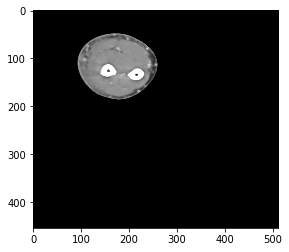

In [70]:
test_slice = dcmread('/content/ct/IM-0001-0100.dcm')
window_center = test_slice[0x0028, 0x1050].value
window_width = test_slice[0x0028, 0x1051].value
rescale = test_slice[0x0028, 0x1052].value

print("level: " + str(window_center))
print("width: " + str(window_width))
print("rescale: " + str(rescale))

vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(test_slice.pixel_array + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [71]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

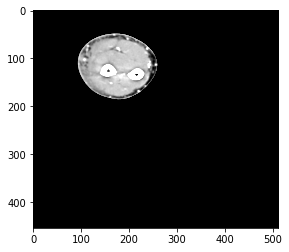

In [72]:
# this one im 
window = 200
level = 0
vmin_2 = level - window/2
vmax_2 = level + window/2
plt.imshow(test_slice.pixel_array + rescale, cmap='gray', vmin=vmin_2, vmax=vmax_2)
plt.show()

In [73]:
# Which values make sense and why?

In [74]:
# Since this is an arm, fat is around -50 and soft tissue 50, 
# with bone much higher. 
# I decided to center it at 0 and then tighten the window more to give 
# it more contrast at the soft tissue and fat zone.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [75]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

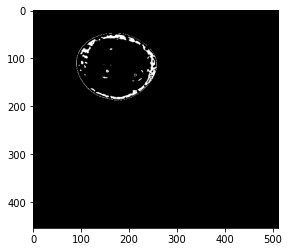

In [76]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_mask = arm_full.copy().astype("int16")
fat_mask = fat_mask + rescale
fat_mask[fat_mask < -100] = 0
fat_mask[fat_mask > 0] = 0
fat_mask[fat_mask != 0] = 1
imshow(fat_mask[:,:,100], cmap='gray')

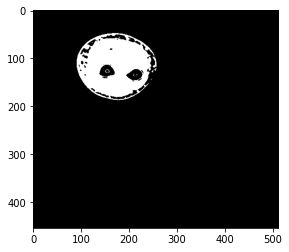

In [77]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

soft_mask = arm_full.copy().astype("int16")
soft_mask = soft_mask + rescale
soft_mask[soft_mask < 0] = 0
soft_mask[soft_mask > 200] = 0
soft_mask[soft_mask != 0] = 1
imshow(soft_mask[:,:,100], cmap='gray')

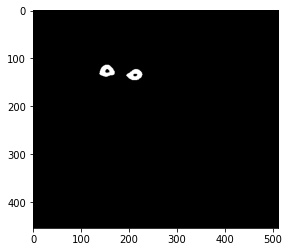

In [78]:
# TODO: YOUR CODE TO SEGMENT BONES

bone_mask = arm_full.copy().astype("int16")
bone_mask = bone_mask + rescale
bone_mask[bone_mask < 200] = 0
bone_mask[bone_mask != 0] = 1
imshow(bone_mask[:,:,100], cmap='gray')

In [79]:
# Are the segmentations good?

In [80]:
# TODO: YOUR ANSWER
# Theyre pretty good, well the thresholds I chose for this. 
# The actual Hounsfield Units did not work so well, so I 
# increased the window for each of the masks and it made it 
# work better.

In [81]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""